# Data Visualisation Tutorial

Translated into a Notebook from https://gilberttanner.com/blog/introduction-to-data-visualization-inpython/.

## Initialisation

### Initialisation - Importing Libraries

In [86]:
# A number of Python libraries are generally imported using the `as` keyword
# to make referring to them in the code easier. There are a number of
# conventions used for different libraries, pandas as pd is a good and
# common example of this.
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Datasets

This tutorial uses two freely available datasets:

- Iris
- Wine Reviews

These are both imported into memory using Pandas `read_csv` method.

### Importing Datasets - Iris

In [47]:
# Read the .csv file into a variable called 'iris' and assign the names
# for each of the columns as noted below.
# My preference is to always assign the column to be used as the index
# and the row to be used as the header. These parameters can use the 
# `None` keyword is the file does not have an index or column headings
# in it.
iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width',
                                      'petal_length', 'petal_width',
                                      'class'],
                   index_col=0, header=0)

# Confirm that the data has been imported correctly by viewing the first
# five rows of data using the pandas 'head' method
print(iris.head())

# If `head()` is used at the end of the Notebook cell then it will print
# the first five rows, otherwise it will need to be passed into a 'print'
# function
iris.head()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
2           4.9          3.0           1.4          0.2  Iris-setosa
3           4.7          3.2           1.3          0.2  Iris-setosa
4           4.6          3.1           1.5          0.2  Iris-setosa
5           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Importing Datasets - Wine Reviews

In [ ]:
# Import the 'wine_reviews' .csv file in the same way as above and save
# to a variable called 'wine_reviews'.
# No heading labels are required as these are a part of the file itself.
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0,
                          header=0)

wine_reviews.head()

## Plotting Datasets (Matplotlib)

Initially the 'Matplotlib' library shall be used for demonstrating a number of the methods by which to start visualising the data.

### Plotting Datasets (Matplotlib) - Scatter Plot

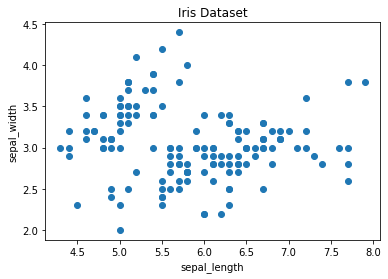

In [60]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Show a scatter plot of the 'sepal_length' against the 'sepal_width'.
# This gives the raw graph without any figure information
ax.scatter(iris['sepal_length'], iris['sepal_width'])

# Add figure details to better describe what the graph represents
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

# Display the plot
# The code works without this section, but it will also show the 
# 'output' of the last line used prior, which would plot the ylabel
# object within the ax object.
plt.show()

#### Plotting Datasets (Matplotlib) - Scatter Plot - Results

As can be seen from the graph, there appear to be at least two clusters of points, albeit with a number of potential outliers. There could be two clusters that are linearly seperable here (can be divided into two groups with a linear/straight line).

Results like this are considered 'unsupervised' as there is no indication as to what the class of each point is on the graph.

The graph figure above shows the raw 'feature' data of the dataset. That is, the dataset values without any reference to the 'class' of each row of data. However, since the class of the data is known, the graph can be improved to better show the class as information embedded into the graph figure through the use of colour-coding.

### Plotting Datasets (Matplotlib) - Scatter Plot (Coloured)

The following cell is the updated method for how to approach this based on Gilbert Tanners tutorial, the original method no longer works with Pandas, as of 2022.

I've added a time to process the cell check as well, this will be compared with the updated version of this below.

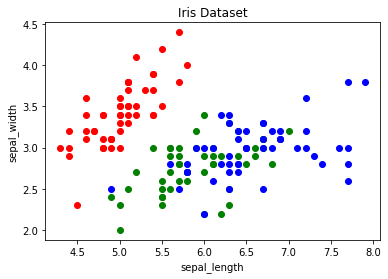

In [51]:
# Time to process cell
start_time = datetime.now()

# First, create a colour dictionary (dictionary as in the Python datatype 'dict')
colours = {
    'Iris-setosa': 'r',
    'Iris-versicolor': 'g',
    'Iris-virginica': 'b'
}

# Create new figure and axis objects
fig, ax = plt.subplots()

# Iterating through each data point in the dataset, plot onto the graph and
# colour each point based on the colour dicionary created above.
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris.iloc[i]['sepal_length'], iris.iloc[i]['sepal_width'],
               color=colours[iris.iloc[i]['class']])

# Add figure details to better describe what the graph represents
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

# Display the plot
plt.show()

end_time = datetime.now()
original_time = end_time - start_time

#### Plotting Datasets (Matplotlib) - Scatter Plot (Coloured) - Results

As can be seen from the graph, the two clusters can now be better seens as one cluster of red and another cluster mixing the green and blue points.

### Plotting Datasets (Matplotlib) - Scatter Plot (Coloured, updated)

The following method is (what I believe to be) a more efficient way of completing the same task. Instead of iterating over every single point, the data can be split into three separate graphs that are all plotted onto the same figure.

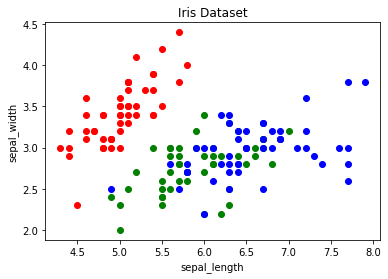

In [55]:
# Time to process cell
start_time = datetime.now()

# First, create a colour dictionary (dictionary as in the Python datatype 'dict')
class_colours = {
    'Iris-setosa': 'r',
    'Iris-versicolor': 'g',
    'Iris-virginica': 'b'
}

# Create new figure and axis objects
fig, ax = plt.subplots()

for class_name in class_colours:
    ax.scatter(
        iris[iris['class'] == class_name]['sepal_length'],
        iris[iris['class'] == class_name]['sepal_width'],
        color = class_colours[class_name],
        label = class_name
    )

# Add figure details to better describe what the graph represents
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

# Display the plot
plt.show()

# Time to process cell
end_time = datetime.now()
updated_time = end_time - start_time

#### Plotting Datasets (Matplotlib) - Scatter Plot (Coloured, updated) - Results

The difference in time taken to process the two different versions is:

In [54]:
# Original time
print('The time taken to process the cell for the two different methods is:')
print(f'Original: {original_time}')
print(f'Updated:  {updated_time}')
print(f'The updated method is {round(original_time / updated_time, 2)}x faster')

The time taken to process the cell for the two different methods is:
Original: 0:00:01.302533
Updated:  0:00:00.126982
The updated method is 10.26x faster


As can be seen, there is a substantial difference in the time taken between the original and updated methods.

### Plotting Datasets (Matplotlib) - Line Chart

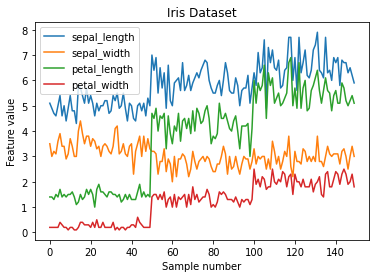

In [64]:
# Get a list of the column labels
columns = iris.columns.drop(['class'])

# Create x axis data range from 0 to the number of samples in the dataset.
# The first value in the tuple that gets returned by the 'shape' method is
# the number of rows in the dataset.
x_data = range(0, iris.shape[0])

# Create figure and axis objects
fig, ax = plt.subplots()

# Loop through the list of columns and plot the data for each of them
for column in columns:
    ax.plot(x_data, iris[column], label=column)

# Add figure details to better describe what the graph represents
ax.set_title('Iris Dataset')
ax.set_xlabel('Sample number')
ax.set_ylabel('Feature value')
ax.legend()

# Display the plot
plt.show()

#### Plotting Datasets (Matplotlib) - Line Charts - Results

The line graph plotted shows that there are a number of samples that move the line up or down at the same time. This might indicated that there are links or correlations between each of the variables plotted.

### Plotting Datasets (Matplotlib) - Histogram

A histogram shows the distributon of frequencies that a particular value appears in the dataset. This next example shows the number of times a particular wine from the wine reviews dataset has a particular score.

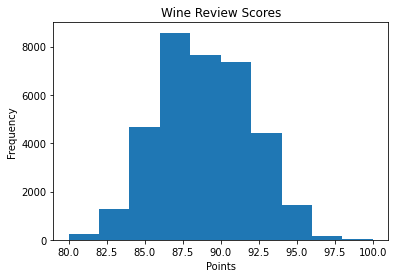

In [65]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(wine_reviews['points'])

# Add figure details to better describe what the graph represents
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()

### Plotting Datasets (Matplotlib) - Bar Chart

Bar charts can be used in a number of ways but the below demonstrates how to use it as a substitute for a histogram.

This requires the number of instances that each value appears, so the Pandas `value_counts` method is used to get the frequency.

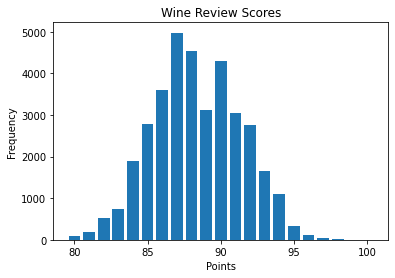

In [73]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Count the number of instances of each points score
data = wine_reviews['points'].value_counts()

# Gets the x and y data values for plotting
points = data.index
frequency = data.values

# Plot the bar chart
ax.bar(points, frequency)

# Add figure details to better describe what the graph represents
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()

## Plotting Datasets (Pandas)

Pandas has built in plotting capability that can make it easy to create plots directly out of the Pandas dataframe or series. It has a higher level API than Matplotlib and can therefore require less code to achieve the same results.

### Plotting Datasets (Pandas) - Scatter plot

<AxesSubplot:title={'center':'Iris Dataset'}, xlabel='sepal_length', ylabel='sepal_width'>

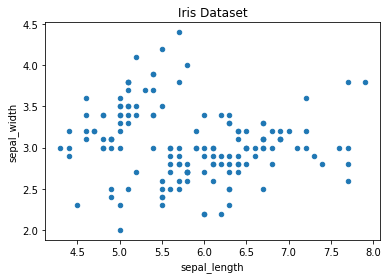

In [74]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

As can be seen, the graph looks very similar to the one produced by Matplotlib, but required just one line of code, and automatically adds some of the details to the plot directly.

### Plotting Datasets (Pandas) - Line Chart

<AxesSubplot:title={'center':'Iris Dataset'}>

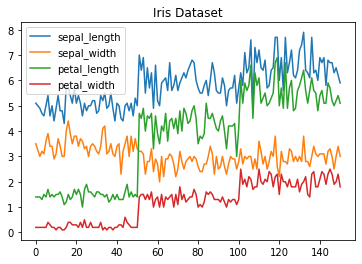

In [75]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

Similarly to the scatter plot, the Pandas `plot` method adds a lot of detail to the plot automatically but, in addition, it has plotted and coloured a line for each of the four columns without specific instructions to do so.

### Plotting Datasets (Pandas) - Histogram¶

<AxesSubplot:ylabel='Frequency'>

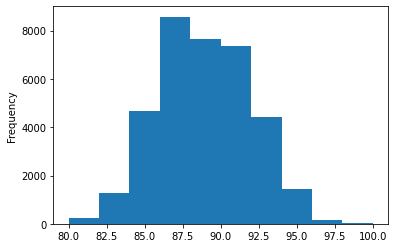

In [76]:
wine_reviews['points'].plot.hist()

Once again, the code required to get a similar plot to the Matplotlib one is a single line.

The Pandas plots also offer a straightforward method to create multiple historgrams in the same figure.

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

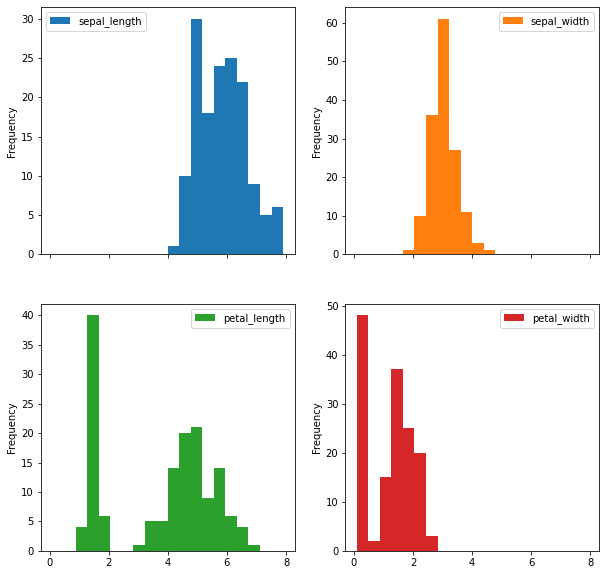

In [78]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

### Plotting Datasets (Pandas) - Bar Chart

<AxesSubplot:>

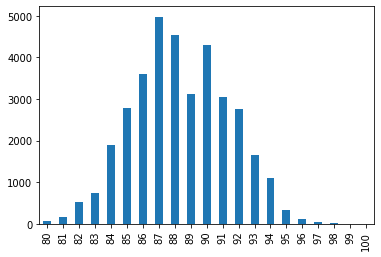

In [83]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

Since the `value_counts` method is part of the Pandas library, it can be called easily in conjunction with other methods, like the bar plot method in this example.

Pandas also offers a horizontal bar chart plot that works in the same manner as the standard one.

<AxesSubplot:>

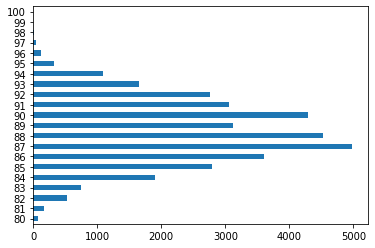

In [84]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

Bar charts can also be produced easily by changing the metric passed to the plot. The following example groups the data by country, then calculates the mean price of the wine, orders it, then plots the five countries with the highest mean price.

<AxesSubplot:xlabel='country'>

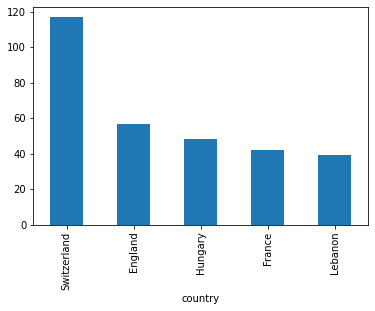

In [85]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

## Plotting Datasets (Seaborn)

Seaborn is a data visualisation library that is based on Matplotlib that has a high-level interface for making well presented graphs.

Similar to Pandas plots, it requires less lines of code to produce and can also interface well with Pandas itself.

### Plotting Datasets (Seaborn) - Scatter plot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

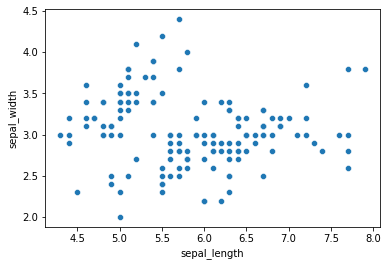

In [87]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

In order to show the classes of the data points, the Seaborn plotting methods can use the `hue` parameter to colour by a particular feature.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

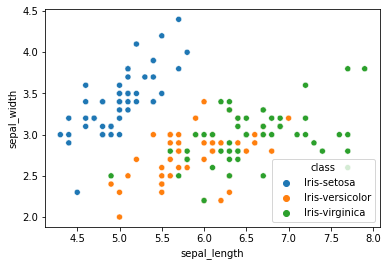

In [88]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Plotting Datasets (Seaborn) - Line chart

The line chart required parameters are similar to the Pandas plot.

<AxesSubplot:>

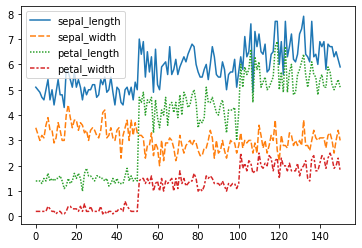

In [89]:
sns.lineplot(data=iris.drop(['class'], axis=1))

### Plotting Datasets (Seaborn) - Histogram

The histogram method in Seaborn is similar manner to the Pandas (in terms of simplicity) plot. The `distplot` referenced in Gilbert Tanner's tutorial is being depreciated (though still present as of 2022) so the `histplot` is used instead.

<AxesSubplot:xlabel='points', ylabel='Count'>

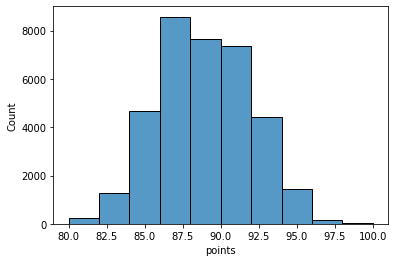

In [97]:
sns.histplot(wine_reviews['points'], bins=10, kde=False)

The histogram can also be plotted with a guassian kernal density estimate on the same graph. This can be done with the Pandas and Matplotlib as well, but is a much simpler process with Seaborn.

<AxesSubplot:xlabel='points', ylabel='Count'>

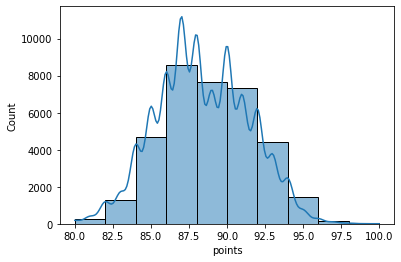

In [99]:
sns.histplot(wine_reviews['points'], bins=10, kde=True)

Seaborn has a method `kdeplot` that smooths out the edges of the data, which can help with datasets that contain lots or widely distributed outliers. This can be plotted as a standalone graph plot, rather than as an addition as shown in the previous example.

<AxesSubplot:ylabel='Density'>

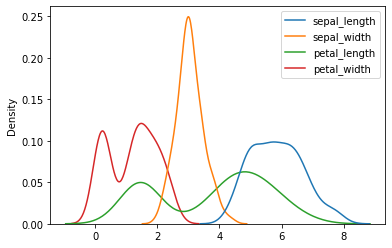

In [100]:
sns.kdeplot(data=iris.drop(['class'], axis=1))

### Plotting Datasets (Seaborn) - Bar Chart

The code below to plot the bar chart differs from Gilbert Tanner's tutorial due to a change in the parameters required for the countplot. It will require one positional arguement (the data) and the x axis has to be defined.

<AxesSubplot:xlabel='points', ylabel='count'>

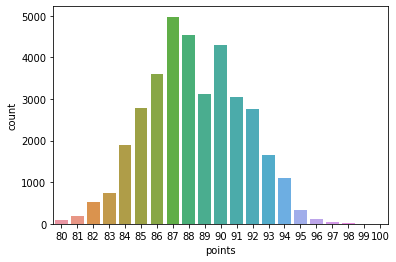

In [110]:
sns.countplot(data=wine_reviews, x=wine_reviews['points'])

## Different Plot Types

Using Seaborn still a number of other graph or plot types will be demonstrated to show different approaches for visualising data.

### Different Plot Types - Box Plot

A box plot is used to display the 'five number summary': minimum, maximum, first, second and third quartiles.

The following example filters the wine reviews to all wines that have 95 or more points and cost less than 1,000, then plots a graph of the points scores against the prices.

<AxesSubplot:xlabel='points', ylabel='price'>

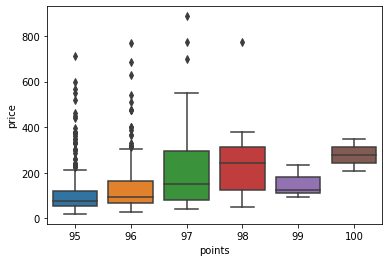

In [115]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot(data=df, x='points', y='price')

### Different Plot Types - Heat Map

A heat map is a graphical form of a correlation table, showing variables that are more correlated to each other than others through different ranges of colour.

<AxesSubplot:>

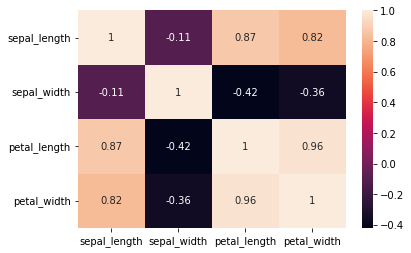

In [116]:
sns.heatmap(iris.corr(), annot=True)

### Different Plot Types - Pairplot

Seaborn and Pandas offer a simple method by which to show a matrix of scatter plots and histograms between each pair of variables. These are useful for any initial data exploration, seeing at a glance any visual correlations between the data.

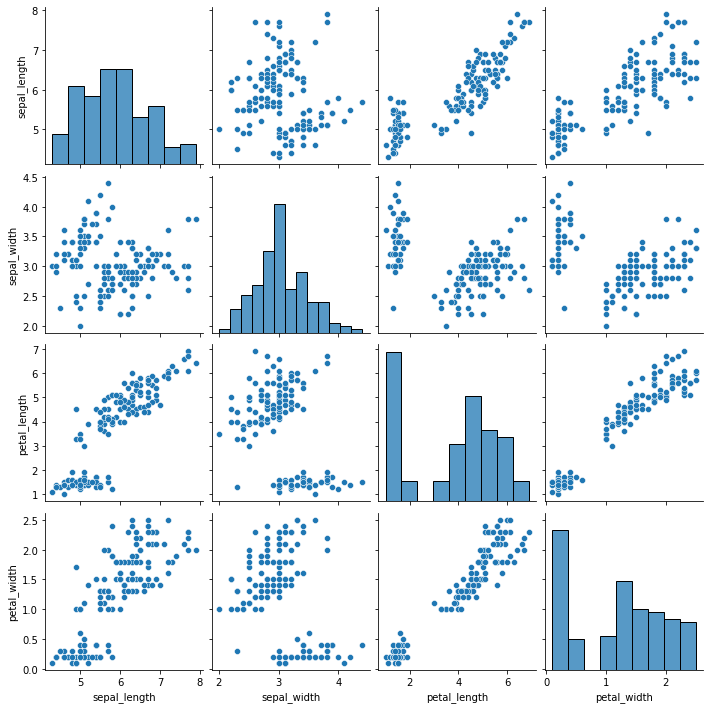

In [117]:
sns.pairplot(iris)

On the diagonals, where the variables are p